In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("accidents.csv")
df.head()

,AccidentDate,Timing,State,WeatherCondition,RoadCondition,Deaths,Reason
0,04-02-2013,Morning,Alaska,Rainy,Under Construction,10,Drunk Driving
1,23-02-2005,Night,Arizona,Clear,Under Construction,3,Weather Conditions
2,08-10-2014,Afternoon,California,Clear,Fine,6,Poor Visibility
3,14-01-2015,Night,Colorado,Rainy,Rough,8,Road Conditions
4,17-01-2006,Afternoon,Georgia,Clear,Fine,2,Speeding


### Dropping unnecessary columns and displaying info()

In [3]:
df.drop(columns=['AccidentDate'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Timing            50000 non-null  object
 1   State             50000 non-null  object
 2   WeatherCondition  50000 non-null  object
 3   RoadCondition     50000 non-null  object
 4   Deaths            50000 non-null  int64 
 5   Reason            50000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB


### Checking for NULL values in the dataset

In [4]:
df.isnull().sum()

Timing              0
State               0
WeatherCondition    0
RoadCondition       0
Deaths              0
Reason              0
dtype: int64

###  Display summary statistics for numerical columns

In [5]:
df.describe()

,Deaths
count,50000.000000
mean,4.983040
std,3.160581
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,10.000000


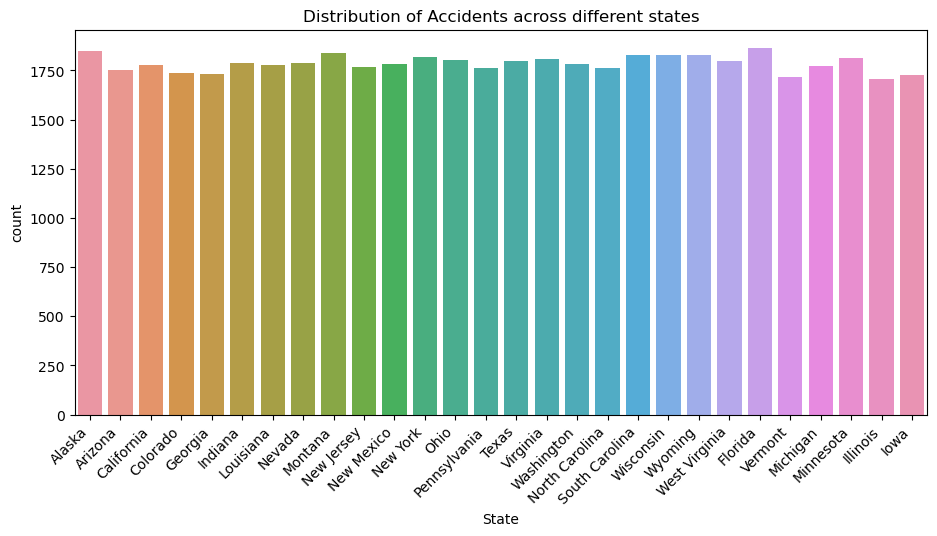

In [14]:
# Distribution of accidents across different states

plt.figure(figsize=(11, 5))
sns.countplot(x='State', data=df)
plt.title("Distribution of Accidents across different states")
plt.xticks(rotation=45, ha='right')
plt.show()

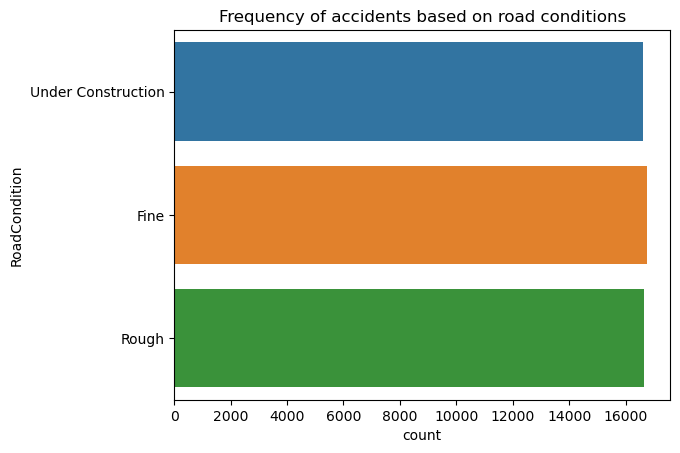

In [20]:
# Frequency of accidents based on road conditions

sns.countplot(y='RoadCondition', data=df)
plt.title("Frequency of accidents based on road conditions")
plt.show()

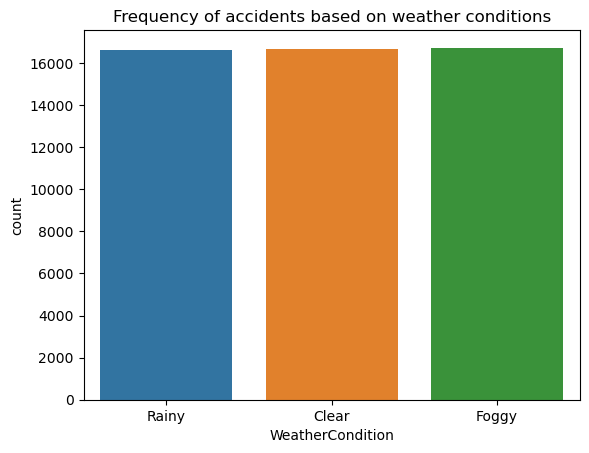

In [23]:
# Frequency of accidents based on weather conditions

sns.countplot(x='WeatherCondition', data=df)
plt.title("Frequency of accidents based on weather conditions")
plt.show()

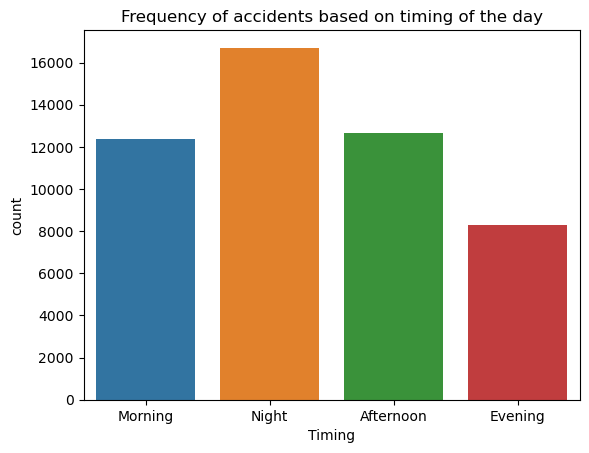

In [24]:
# Frequency of accidents based on the timing of the day

sns.countplot(x='Timing', data=df)
plt.title("Frequency of accidents based on timing of the day")
plt.show()

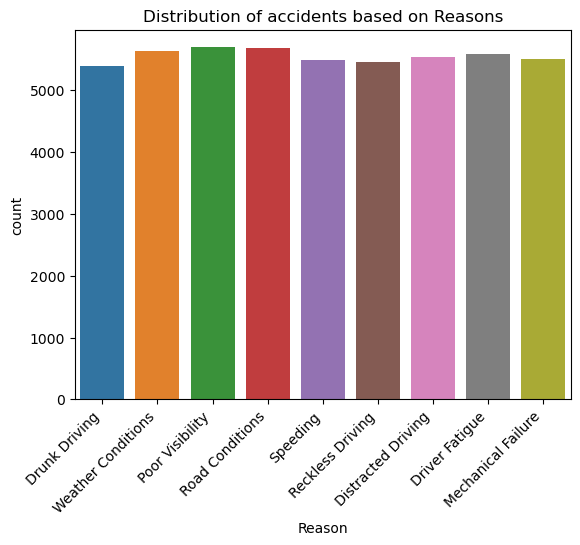

In [26]:
# Distribution of accidents based on Reasons

sns.countplot(x='Reason', data=df)
plt.title("Distribution of accidents based on Reasons")
plt.xticks(rotation=45, ha='right')
plt.show()

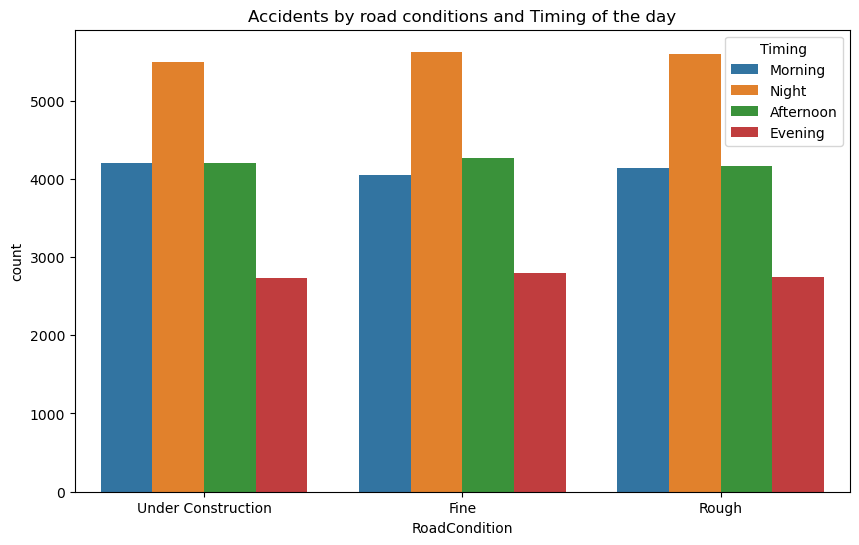

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RoadCondition', hue='Timing', data=df)
plt.title("Accidents by road conditions and Timing of the day")
plt.show()

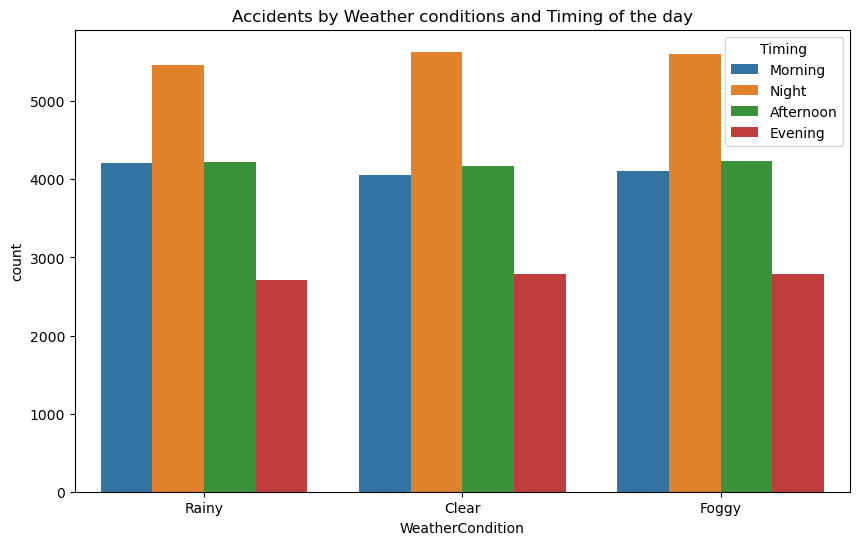

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='WeatherCondition', hue='Timing', data=df)
plt.title("Accidents by Weather conditions and Timing of the day")
plt.show()

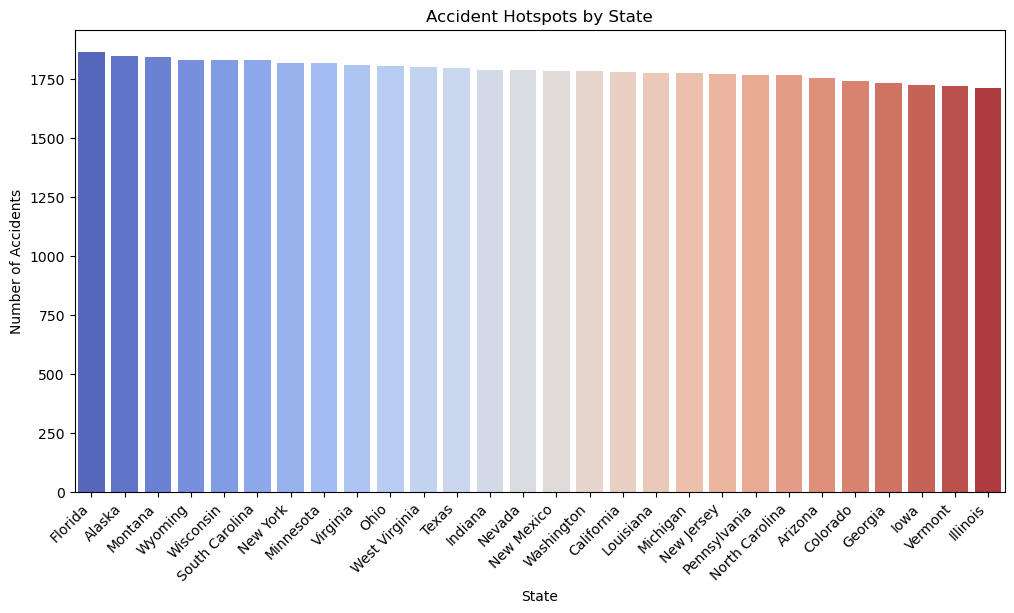

In [35]:
# Visualize accident hotspots (States with higher accident frequencies)

plt.figure(figsize=(12, 6))
state_acci = df['State'].value_counts()
sns.barplot(x=state_acci.index, y=state_acci.values, palette='coolwarm')
plt.title("Accident Hotspots by State")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

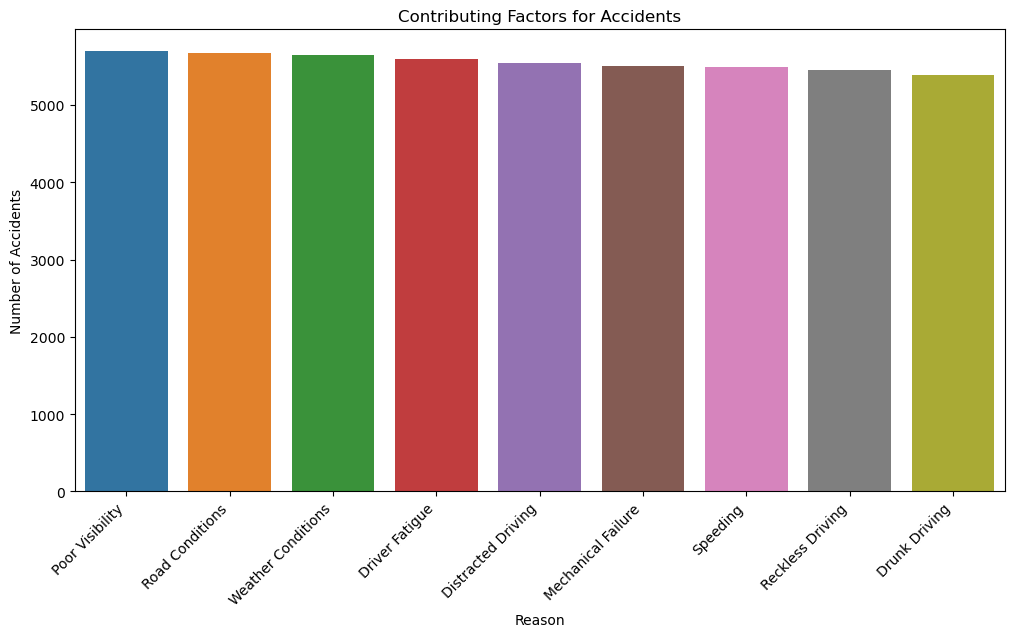

In [37]:
# Visualize contributing factors (Reasons for accidents)

plt.figure(figsize=(12, 6))
reasons_accidents = df['Reason'].value_counts()
sns.barplot(x=reasons_accidents.index, y=reasons_accidents.values)
plt.title("Contributing Factors for Accidents")
plt.xlabel("Reason")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

<Figure size 5400x800 with 0 Axes>

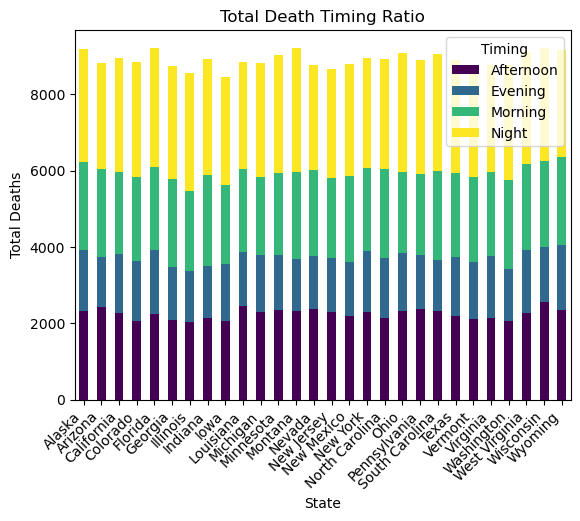

In [41]:
# Group the data by state and timing, and calculate the total number of deaths
state_timing_deaths = df.groupby(['State', 'Timing'])['Deaths'].sum().reset_index()

# Pivot the table to get a format suitable for plotting
state_timing_deaths_pivot = state_timing_deaths.pivot(index='State', columns='Timing', values='Deaths').fillna(0)

# Create a bar plot for state-wise total death timing ratio
plt.figure(figsize=(54, 8))
state_timing_deaths_pivot.plot(kind='bar', stacked=True, colormap="viridis")
plt.title("Total Death Timing Ratio")
plt.xlabel("State")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Timing")
plt.show()